# Principal Component Analysis in Villes Dataset

### Description: 
This code example tries to emulate the example of "Aprender de los Datos, El Análisis de Componentes Principales, una aproximación desde el Data Mining" book of "Tomas Aluja" and "Alain Morineau"

## Project: 
[r-examples](https://github.com/garciparedes/r-examples)

## Author: 
[Sergio García Prado](garciparedes.me)

### Date: 
2017-12

In [1]:
rm(list = ls())

In [2]:
column.index <- function(data, columns.name) {
  match(columns.name, colnames(data))
}

In [3]:
filter.by.factor <- function(data, columns.name, factor, columns.remove = TRUE) {
  col.index <- column.index(data, columns.name)
  indexer <- is.element(villes[, col.index], factor)
  if (columns.remove) {
    return(data[indexer, - col.index])
  } else {
    return(data[indexer, ])
  }
}

In [4]:
filter.by.columns <- function(data, columns.name, reverse = FALSE) {
  col.index <- column.index(data, columns.name)
  if (reverse){
    col.index <- - col.index
  }
  return(data[, col.index])
}

In [5]:
filter.complete <- function(data) {
  data[complete.cases(data),]
}

In [6]:
villes <- read.csv("./../datasets/villes.csv")
summary(villes)  

         Ciudad              Año                 Región.del.mundo
 AbuDhabi91 :  1   Edition 1991:53   CENTRAL EUROPE      :18     
 AbuDhabi94 :  1   edition 1994:53   NORD AMERIQUE       :14     
 Amsterdam91:  1                     NORD EUROPE         :12     
 Amsterdam94:  1                     SUD AMERIQUE        :12     
 Athenes91  :  1                     SUD ASIE ET AUSTRALI:12     
 Athenes94  :  1                     EST ASIE            :10     
 (Other)    :100                     (Other)             :28     
 Indice.precios.sin.alquiler Indice.precio.con.alquiler Indice.salarios.bruto
 Min.   : 30.3               Min.   : 30.20             Min.   :  2.10       
 1st Qu.: 52.8               1st Qu.: 55.90             1st Qu.: 14.40       
 Median : 67.5               Median : 71.30             Median : 43.00       
 Mean   : 68.1               Mean   : 71.76             Mean   : 41.83       
 3rd Qu.: 80.4               3rd Qu.: 85.60             3rd Qu.: 65.40       
 Max

In [7]:
head(villes)

Ciudad,Año,Región.del.mundo,Indice.precios.sin.alquiler,Indice.precio.con.alquiler,Indice.salarios.bruto,Indice.salarios.neto,Horas.anuales.de.trabajo,Vacaciones.anuales.pagadas,Poder.compra.bruto,⋯,Mecánico.Med.1,Obrero.constr.Med.1,Tornero.Med.1,Jefe.de.cocina.Med.1,Diretor.fábrica.Med.1,Ingeniero.Med.1,Cajero.banco.Med.1,Secretaria.dirección.Med.1,Dependienta.Med.1,Trabajador.text.Med.1
AbuDhabi91,Edition 1991,PROCHE ORIENT,NA,NA,NA,NA,NA,NA,NA,⋯,,,,,,,,,,
AbuDhabi94,edition 1994,PROCHE ORIENT,71.3,78.1,29.9,38.0,2100,28.9,42.0,⋯,0.5770 0.68,0.1330 0.26,0.1312 0.75,2.2949 2.48,6.5651 9.13,3.9393 4.37,3.2258 3.50,1.0769 1.11,1.0769 1.13,0.1312 0.36
Amsterdam91,Edition 1991,CENTRAL EUROPE,65.6,65.7,56.9,49.0,1714,31.9,86.7,⋯,0.8876 0.90,0.9425 0.96,1.0820 1.09,1.0602 1.07,1.9101 1.94,1.8450 1.88,1.0949 1.11,1.1070 1.12,0.8820 0.90,0.8074 0.83
Amsterdam94,edition 1994,CENTRAL EUROPE,68.8,70.3,61.4,53.7,1792,27.5,89.3,⋯,0.8655 0.87,0.7819 0.79,1.3147 1.34,0.8712 0.95,1.9935 2.04,1.9597 1.98,1.3495 1.36,1.0202 1.03,0.7619 0.77,0.8074 0.83
Athenes91,Edition 1991,SUD EUROPE,53.8,55.6,30.2,30.4,1792,23.5,56.1,⋯,0.9784 1.00,1.1152 1.13,1.6435 1.88,1.5613 1.69,1.5623 1.58,1.6746 1.72,1.1088 1.14,0.7567 0.83,0.5198 0.54,0.6574 0.66
Athenes94,edition 1994,SUD EUROPE,54.4,56.7,27.7,28.5,1775,24.5,50.9,⋯,0.6898 0.75,1.1152 1.13,1.0959 1.10,1.2568 1.27,1.4141 1.45,1.4946 1.54,1.2647 1.31,1.0202 1.03,0.6595 0.68,0.7037 0.71


In [8]:
cols <- c("Ciudad", "Región.del.mundo", "Maestro", "Chófer.de.autobús",
          "Mecánico.de.coche", "Obrero.de.la.construcción", "Tornero", 
          "Jefe.de.cocina", "Director.de.fábrica", "Ingeniero", "Cajero.banco",
          "Secretaria.de.dirección", "Dependienta", "Trabajador.textil")

villes.use <- filter.complete(filter.by.columns(filter.by.factor(
  villes, "Año", "edition 1994"), cols))

# villes.use <- villes.use[- 1,]
villes.use[,-c(1,2)] <- villes.use[, -c(1, 2)] / rowMeans(villes.use[, -c(1, 2)])

head(villes.use)

,Ciudad,Región.del.mundo,Maestro,Chófer.de.autobús,Mecánico.de.coche,Obrero.de.la.construcción,Tornero,Jefe.de.cocina,Director.de.fábrica,Ingeniero,Cajero.banco,Secretaria.de.dirección,Dependienta,Trabajador.textil
2,AbuDhabi94,PROCHE ORIENT,0.7287449,0.4260355,0.3438181,0.1308004,0.2541264,1.2668950,3.550296,2.231081,1.7863594,0.5493616,0.5493616,0.1831205
4,Amsterdam94,CENTRAL EUROPE,1.1623932,1.2161172,0.6984127,0.6349206,1.0744811,0.7619048,1.641026,1.592186,1.0989011,0.8302808,0.6202686,0.6691087
6,Athenes94,SUD EUROPE,1.0548303,1.1801567,0.6266319,1.0130548,1.0026110,1.1488251,1.284595,1.357702,1.1488251,0.9295039,0.6057441,0.6475196
8,Bangkok94,SUD ASIE ET AUSTRALI,0.5146444,0.4267782,0.3263598,0.2133891,0.8284519,1.0669456,3.426778,2.246862,1.6066946,0.8912134,0.2133891,0.2384937
10,Bogota94,SUD AMERIQUE,0.4484959,0.4484959,0.7110301,0.1859617,0.6016408,1.2689152,3.445761,2.078396,0.9188696,0.9954421,0.3391067,0.5578851
12,Bombay94,SUD ASIE ET AUSTRALI,0.8609865,0.9147982,0.6995516,0.4304933,0.7533632,1.4529148,2.313901,1.130045,0.9686099,1.1838565,0.5919283,0.6995516


In [9]:
print(dim(villes.use))

[1] 51 14


In [10]:
villes.use.pca <- princomp(scale(filter.by.columns(
  villes.use, c("Ciudad", "Región.del.mundo"), reverse = TRUE)))

In [11]:
print(villes.use.pca)

Call:
princomp(x = scale(filter.by.columns(villes.use, c("Ciudad", 
    "Región.del.mundo"), reverse = TRUE)))

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
2.1402086 1.2568231 1.1355367 1.0022107 0.9958883 0.8217689 0.7036529 0.6325282 
   Comp.9   Comp.10   Comp.11   Comp.12 
0.5883481 0.4912201 0.4012121 0.0000000 

 12  variables and  51 observations.


## Variance Ratio by Component

In [12]:
(villes.use.pca$sdev ^ 2) / sum(villes.use.pca$sdev ^ 2)

Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
0.38934189 0.13426636 0.10960272 0.08537624 0.08430245 0.05740086 0.04208583 
    Comp.8     Comp.9    Comp.10    Comp.11    Comp.12 
0.03400781 0.02942304 0.02051026 0.01368255 0.00000000

### Row Proyection Weights

In [13]:
villes.use.pca$loadings


Loadings:
                          Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
Maestro                   -0.286  0.323         0.533                     
Chófer.de.autobús         -0.366  0.213                                   
Mecánico.de.coche         -0.279 -0.295 -0.128 -0.479  0.349 -0.144  0.236
Obrero.de.la.construcción -0.396         0.123         0.233              
Tornero                   -0.310 -0.137 -0.445 -0.204 -0.101  0.308       
Jefe.de.cocina             0.223 -0.213         0.410  0.678        -0.205
Director.de.fábrica        0.329  0.321 -0.176 -0.335 -0.232        -0.459
Ingeniero                  0.261 -0.341 -0.287  0.272 -0.353 -0.101  0.544
Cajero.banco               0.196  0.292  0.595 -0.199         0.111  0.518
Secretaria.de.dirección    0.134 -0.523  0.377        -0.106  0.522 -0.269
Dependienta               -0.210 -0.329  0.343        -0.244 -0.720 -0.171
Trabajador.textil         -0.358 -0.106  0.199  0.204 -0.308  0.220 -0.117
              

## Absolute Contributions

In [14]:
villes.use.pca.ctr.abs <- t(t(villes.use.pca$scores) ^ 2 / (dim(villes.use)[1] * villes.use.pca$sdev ^ 2))
data.frame(villes.use[, "Ciudad"], round(villes.use.pca.ctr.abs, digits = 6))

,villes.use....Ciudad..,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
2,AbuDhabi94,0.116251,0.064882,0.001057,0.000648,0.001923,0.141528,0.026417,0.000251,0.034280,0.003497,0.000105,Inf
4,Amsterdam94,0.012425,0.005107,0.000099,0.003952,0.011756,0.002437,0.000874,0.037565,0.012883,0.000565,0.006310,Inf
6,Athenes94,0.014969,0.001210,0.007824,0.010644,0.005747,0.015379,0.002468,0.016509,0.001554,0.013168,0.162517,Inf
8,Bangkok94,0.103560,0.026276,0.021662,0.006696,0.005310,0.071168,0.023762,0.002476,0.012295,0.003865,0.019802,Inf
10,Bogota94,0.058353,0.001016,0.019397,0.003264,0.003515,0.019370,0.029531,0.004613,0.140287,0.086184,0.116121,Inf
12,Bombay94,0.000697,0.003593,0.014621,0.003008,0.002802,0.019862,0.174977,0.018797,0.000440,0.013914,0.056766,Inf
14,Bruxelles94,0.004496,0.000143,0.003812,0.000084,0.000109,0.000280,0.003758,0.000917,0.004921,0.063987,0.000664,Inf
16,Budapest94,0.000345,0.004702,0.003121,0.000995,0.017553,0.000994,0.003059,0.043869,0.007284,0.037440,0.000000,Inf
18,BuenosAires94,0.056670,0.018487,0.291103,0.052868,0.019718,0.000025,0.034810,0.026300,0.003322,0.008819,0.000050,Inf
22,Caracas94,0.056134,0.133280,0.000843,0.168517,0.001583,0.024649,0.000694,0.023522,0.001777,0.016098,0.079121,Inf


## Relative Contributions

In [15]:
villes.use.pca.ctr.rel <- (villes.use.pca$scores ^ 2 / (rowSums(villes.use.pca$scores ^ 2)))
data.frame(villes.use[, "Ciudad"], round(villes.use.pca.ctr.rel, digits = 6))

,villes.use....Ciudad..,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
2,AbuDhabi94,0.700294,0.134784,0.001793,0.000856,0.002508,0.125694,0.017202,0.000132,0.015605,0.001110,0.000022,0
4,Amsterdam94,0.550119,0.077975,0.001239,0.038370,0.112694,0.015907,0.004183,0.145272,0.043106,0.001318,0.009817,0
6,Athenes94,0.472720,0.013176,0.069553,0.073711,0.039296,0.071603,0.008426,0.045539,0.003710,0.021907,0.180360,0
8,Bangkok94,0.758998,0.066411,0.044692,0.010761,0.008427,0.076898,0.018825,0.001585,0.006810,0.001492,0.005100,0
10,Bogota94,0.639041,0.003837,0.059797,0.007838,0.008334,0.031273,0.034957,0.004412,0.116101,0.049720,0.044690,0
12,Bombay94,0.020756,0.036921,0.122628,0.019652,0.018075,0.087247,0.563536,0.048917,0.000992,0.021839,0.059438,0
14,Bruxelles94,0.451658,0.004963,0.107806,0.001845,0.002371,0.004144,0.040815,0.008046,0.037364,0.338644,0.002344,0
16,Budapest94,0.025186,0.118397,0.064152,0.015933,0.277502,0.010703,0.024142,0.279784,0.040192,0.144007,0.000000,0
18,BuenosAires94,0.338054,0.038030,0.488841,0.069156,0.025468,0.000022,0.022446,0.013703,0.001498,0.002771,0.000010,0
22,Caracas94,0.376345,0.308150,0.001591,0.247747,0.002298,0.024364,0.000503,0.013775,0.000900,0.005685,0.018642,0


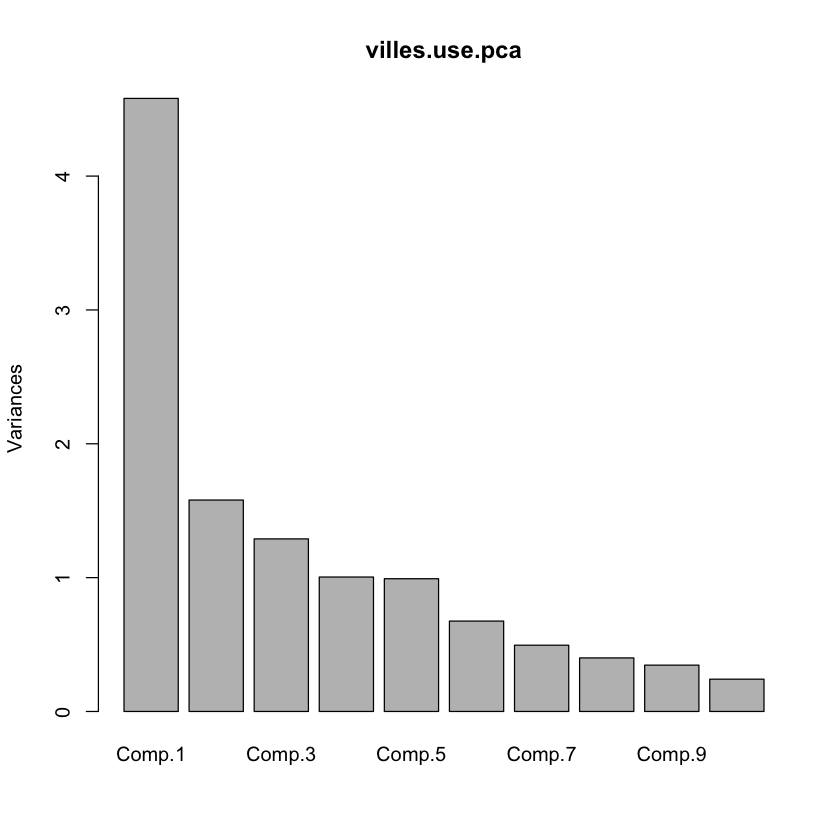

In [16]:
plot(villes.use.pca)

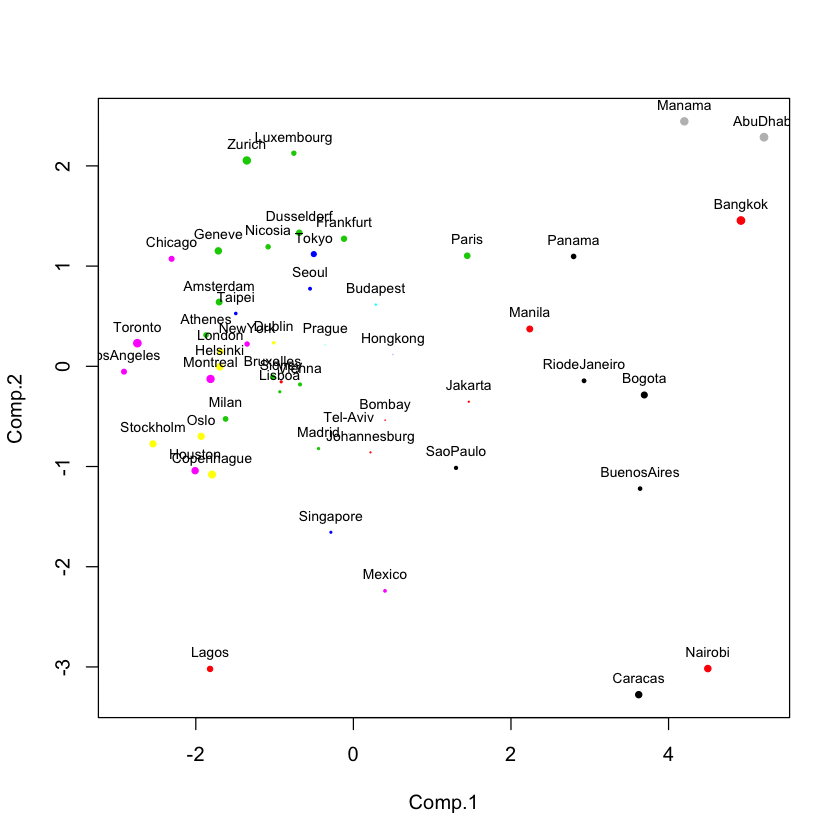

In [17]:
plot(villes.use.pca$scores[,1:2], pch = 20, cex = rowSums(villes.use.pca.ctr.rel[,1:2]) * 1.5,
     col = as.numeric(villes.use[, "Región.del.mundo"]) + 1)
text(villes.use.pca$scores[,1:2], cex = 0.7, pos = 3,
     labels = sub("94", "", villes.use[,"Ciudad"]))
#legend(1,-2.2,levels(villes.use[, "Región.del.mundo"]), pch=20,cex=0.5, col=2:nlevels(villes.use[, "Región.del.mundo"]))

In [18]:
villes.use.pca.scores.vars <- t(villes.use.pca$sdev * t(villes.use.pca$loadings))

print(round(villes.use.pca.scores.vars[, 1:2], digits = 2))

                          Comp.1 Comp.2
Maestro                    -0.61   0.41
Chófer.de.autobús          -0.78   0.27
Mecánico.de.coche          -0.60  -0.37
Obrero.de.la.construcción  -0.85   0.06
Tornero                    -0.66  -0.17
Jefe.de.cocina              0.48  -0.27
Director.de.fábrica         0.70   0.40
Ingeniero                   0.56  -0.43
Cajero.banco                0.42   0.37
Secretaria.de.dirección     0.29  -0.66
Dependienta                -0.45  -0.41
Trabajador.textil          -0.77  -0.13


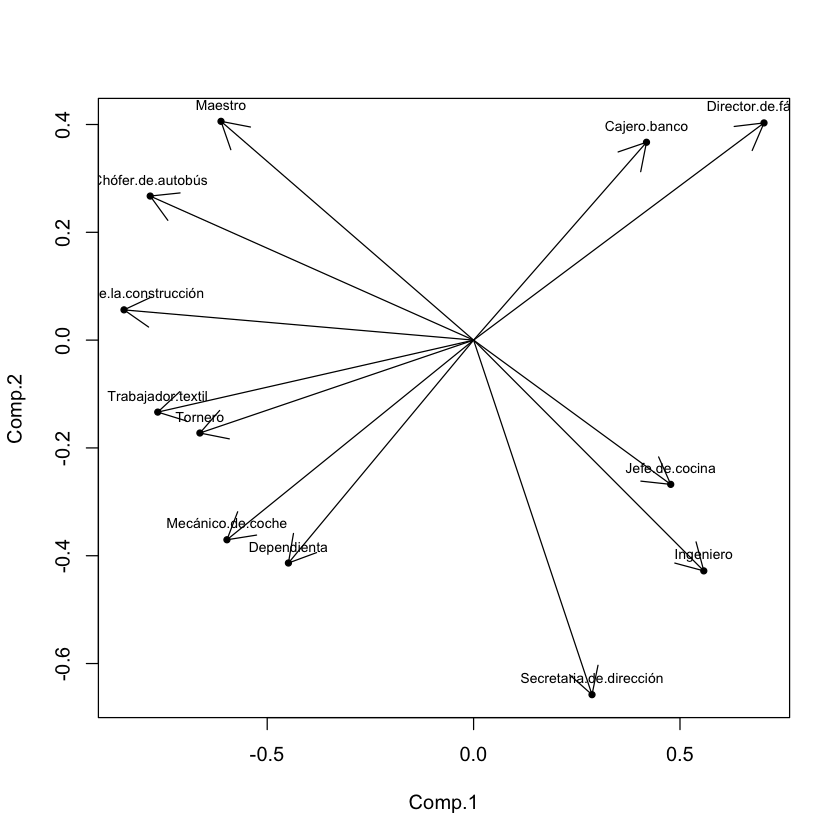

In [19]:
plot(villes.use.pca.scores.vars[, 1:2], pch = 20)
arrows(0, 0, villes.use.pca.scores.vars[, 1], villes.use.pca.scores.vars[, 2])
text(villes.use.pca.scores.vars[, 1:2], cex = 0.7, pos = 3,
     labels = colnames(villes.use[, -c(1, 2)]))

### Column Proyection Weights

In [20]:
(villes.use.pca.loadings.columns <- scale(villes.use[, -c(1, 2)]) %*% 
                                    villes.use.pca$loadings   %*% 
                                    diag(1/svd(scale(villes.use[, -c(1, 2)]))$d))


2,0.340956576,0.2547185398,0.032516120,0.025455430,-0.0438541954,-0.376202679,0.162533258,-0.01583918,0.185148044,0.05913876,0.0102536062,-0.241626868
4,-0.111468729,0.0714633014,-0.009969838,0.062865874,-0.1084230095,0.049365475,0.029562887,0.19381729,-0.113505343,-0.02377087,0.0794340271,-0.262946886
6,-0.122348857,0.0347829954,0.088452997,0.103171736,0.0758085904,0.124014011,-0.049682906,0.12848918,0.039426657,-0.11475382,0.4031344634,-0.497467081
8,0.321808113,0.1620989754,-0.147179133,-0.081826485,-0.0728709475,0.266773073,0.154150401,-0.04976323,0.110883971,-0.06216819,0.1407183945,-0.753307294
10,0.241564660,-0.0318760351,-0.139272009,-0.057130302,-0.0592835903,0.139174590,-0.171844831,0.06791828,0.374549025,0.29357104,-0.3407650604,0.262280635
12,0.026393643,-0.0599443189,0.120915523,0.054844068,0.0529319303,0.140933580,-0.418302655,0.13710094,-0.020987437,0.11795712,-0.2382563729,0.376653647
14,-0.067049968,-0.0119688831,0.061740614,0.009151818,-0.0104403762,-0.016726878,-0.061305647,-0.03028056,0.070152258,-0.25295635,0.0257642593,0.007106673
16,0.018572646,0.0685719610,0.055866928,-0.031546021,0.1324866915,-0.031532140,-0.055306954,0.20945032,0.085346063,-0.19349302,-0.0002725572,-0.154792212
18,0.238055327,-0.1359651303,0.539539914,-0.229931047,-0.1404203806,-0.004958097,0.186574613,-0.16217214,-0.057639365,-0.09390779,0.0070712308,0.206093505
22,0.236926320,-0.3650760069,-0.029033078,0.410508427,0.0397854053,-0.157000814,-0.026349244,-0.15337034,0.042152161,0.12687649,0.2812838793,0.461933718
24,-0.150962602,0.1194986619,-0.201341949,-0.080043826,0.1293723650,0.156995969,-0.047873518,-0.08538635,-0.079014178,0.14092261,0.2145590160,-0.302033585


### Data Matrix Reconstruction

In [21]:
villes.use.pca.loadings.columns[,1:11] %*% 
   diag(svd(scale(villes.use[, -c(1, 2)]))$d[1:11]) %*% 
   t(villes.use.pca$loadings)[1:11,] 

,Maestro,Chófer.de.autobús,Mecánico.de.coche,Obrero.de.la.construcción,Tornero,Jefe.de.cocina,Director.de.fábrica,Ingeniero,Cajero.banco,Secretaria.de.dirección,Dependienta,Trabajador.textil
2,-0.701723651,-1.778866595,-1.773919331,-1.746009052,-3.05651460,0.48346188,2.33428388,1.48299437,1.80450498,-1.88855772,-0.429551662,-2.166944070
4,0.692746913,1.645309599,-0.319863432,0.175295034,0.62321916,-0.81818085,-0.51753644,-0.11165187,-0.19048135,-0.32718399,0.117184669,0.679078574
6,0.346859958,1.489458268,-0.614209055,1.616440789,0.30084289,0.17912942,-1.04992588,-0.69690889,-0.04560328,0.22430656,0.005192011,0.552649503
8,-1.390200974,-1.775647596,-1.845509071,-1.431246662,-0.48035469,-0.03191979,2.14978928,1.52238352,1.28312225,0.01148448,-3.020102841,-1.842669941
10,-1.602912721,-1.681524322,-0.268124397,-1.535778050,-1.49772477,0.48866900,2.17814351,1.10190109,-0.71292801,0.59079682,-2.050744474,0.027736188
12,-0.276477981,0.339407484,-0.315193360,-0.603818910,-0.81716787,0.96293894,0.48751805,-1.26512925,-0.56858316,1.63802039,-0.101336752,0.857356964
14,-0.072528276,0.105628910,-0.293414118,0.662053299,0.49429564,0.04744719,-0.35386574,-0.53822091,0.07440229,-0.15723895,0.724908410,0.753122989
16,-0.843092099,0.614451619,-0.242039472,0.116772438,-0.39345092,0.83215126,0.14853730,-0.66729984,0.59497898,-0.59214987,-0.139671798,0.007021116
18,-1.974559477,-2.182414665,-0.696112314,-0.975681518,-2.00618216,-0.70346119,0.36858802,0.34610450,3.81285205,2.66528906,1.495416503,-0.639799580
22,-0.232587201,-2.260657725,-1.318782329,-1.044487103,-1.68555262,2.71876243,-0.66939349,2.98739605,-1.34892816,1.86386378,0.729713935,-1.190525403
